In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import gensim

C:\Users\gneur\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


# idee

NLP:
    - pos tagging per contare numero di aggettivi 
    - qualcosa per vedere se aggettivi sono positivi o negativi (direttamente sentiment analysis)?
    - rimuovere gli @ vs tenere solo i più frequenti 
    - rimuovere i link
    - pulire gli hashtag? 
    - word2vec distance per avere simili tweet assieme nello spazio vettoriale?
    - ridurre parole presenti? 
    - tfidf?
    
Processo:
    - clustering interno all'anno
    - clustering generale 
    - clustering con/senza sentiment meaning

In [2]:
data = pd.read_json("dataWithTags.json")
data['created_at'] = pd.to_datetime(data.created_at, format="%Y-%m-%d %H:%M:%S")
data.sort_values(by=['created_at'], inplace=True, ascending=True)
data.reset_index(inplace=True,drop=True)
data

,created_at,favorite_count,id_str,in_reply_to_user_id_str,is_retweet,retweet_count,source,text,modded_text,@johnboehner,...,@trumpdoral,@dianejackson9,@toure,@floydmayweather,@10ajmccarron,@rspbscotland,@newyorkgop,@mattginellagc,@foxandfriends,@cnn
0,2009-05-04 18:54:25,202,1698308935,NaN,False,253,Twitter Web Client,Be sure to tune in and watch Donald Trump on L...,be sure to tune in and watch donald trump on l...,0,...,0,0,0,0,0,0,0,0,0,0
1,2009-05-05 01:00:10,3,1701461182,NaN,False,2,Twitter Web Client,Donald Trump will be appearing on The View tom...,donald trump will be appearing on the view tom...,0,...,0,0,0,0,0,0,0,0,0,0
2,2009-05-08 13:38:08,2,1737479987,NaN,False,3,Twitter Web Client,Donald Trump reads Top Ten Financial Tips on L...,donald trump reads top ten financial tips on l...,0,...,0,0,0,0,0,0,0,0,0,0
3,2009-05-08 20:40:15,27,1741160716,NaN,False,8,Twitter Web Client,New Blog Post: Celebrity Apprentice Finale and...,new blog post celebrity apprentice finale and ...,0,...,0,0,0,0,0,0,0,0,0,0
4,2009-05-12 14:07:28,1950,1773561338,NaN,False,1421,Twitter Web Client,"""My persona will never be that of a wallflower...",my persona will never be that of a wallflower ...,0,...,0,0,0,0,0,0,0,0,0,0
5,2009-05-12 19:21:55,13,1776419923,NaN,False,10,Twitter Web Client,"Miss USA Tara Conner will not be fired - ""I've...",miss usa tara conner will not be fired ive al...,0,...,0,0,0,0,0,0,0,0,0,0
6,2009-05-13 17:38:28,10,1786560616,NaN,False,11,Twitter Web Client,Listen to an interview with Donald Trump discu...,listen to an interview with donald trump discu...,0,...,0,0,0,0,0,0,0,0,0,0
7,2009-05-14 16:30:40,6,1796477499,NaN,False,3,Twitter Web Client,"""Strive for wholeness and keep your sense of w...",strive for wholeness and keep your sense of wo...,0,...,0,0,0,0,0,0,0,0,0,0
8,2009-05-15 14:13:13,2,1806258917,NaN,False,1,Twitter Web Client,"Enter the ""Think Like A Champion"" signed book ...",enter the think like a champion signed book an...,0,...,0,0,0,0,0,0,0,0,0,0
9,2009-05-16 22:22:45,5,1820624395,NaN,False,3,Twitter Web Client,"""When the achiever achieves, it's not a platea...",when the achiever achieves its not a plateau i...,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.drop(["in_reply_to_user_id_str","id_str","source"], inplace=True,axis=1) 

# Aggiungi dati per il tempo

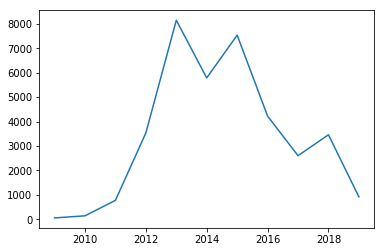

In [4]:
#exploit time
data['month'] = [d.month for d in data['created_at']]
data["year"] = [d.year for d in data["created_at"]]
data["hour"] = [d.hour for d in data["created_at"]]
data["week_year"] = [d.weekofyear for d in data["created_at"]]
data["date"] = [d.date() for d in data["created_at"]]
temp = data.groupby(["year"])["year"].count()
plt.plot(temp)

annuncio campagna elettorale giugno 2015

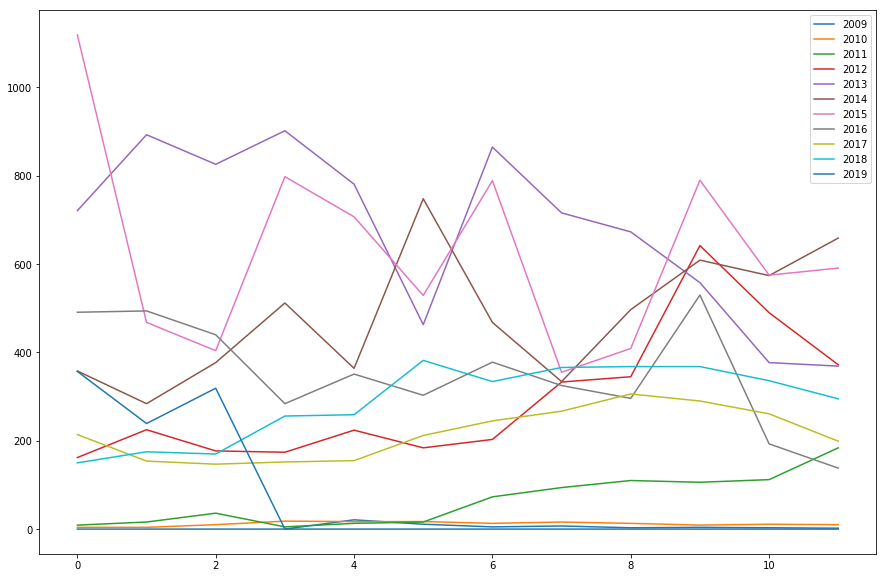

In [5]:
temp = pd.DataFrame({'count' : data.groupby( [ "year", "month"] ).size()}).reset_index()
#temp
#plotta nel corso dei mesi il numero di tweet per anni, devi prendere i dati per ogni anno e farli di lunghezza uguale come array e poi plotti 

l = []
for year in temp["year"].unique().tolist():
    l1 = [0] * 12
    t = temp[temp["year"] == year]
    for idx,row in t.iterrows():
        l1[row["month"]-1] = row["count"]
    l.append(l1)

leg = temp["year"].unique().tolist()
fig, ax = plt.subplots(figsize = (15, 10))
months = [x for x in range(0,12)]
for i in range(0,len(l)):
    plt.plot(months, l[i],label = leg[i])
plt.legend()

In [6]:
data.drop("created_at", inplace=True,axis=1)
data.drop("is_retweet", inplace=True,axis=1)
data

,favorite_count,retweet_count,text,modded_text,@johnboehner,@barackobama,@karlrove,@ivankatrump,@jonhuntsman,@mittromney,...,@rspbscotland,@newyorkgop,@mattginellagc,@foxandfriends,@cnn,month,year,hour,week_year,date
0,202,253,Be sure to tune in and watch Donald Trump on L...,be sure to tune in and watch donald trump on l...,0,0,0,0,0,0,...,0,0,0,0,0,5,2009,18,19,2009-05-04
1,3,2,Donald Trump will be appearing on The View tom...,donald trump will be appearing on the view tom...,0,0,0,0,0,0,...,0,0,0,0,0,5,2009,1,19,2009-05-05
2,2,3,Donald Trump reads Top Ten Financial Tips on L...,donald trump reads top ten financial tips on l...,0,0,0,0,0,0,...,0,0,0,0,0,5,2009,13,19,2009-05-08
3,27,8,New Blog Post: Celebrity Apprentice Finale and...,new blog post celebrity apprentice finale and ...,0,0,0,0,0,0,...,0,0,0,0,0,5,2009,20,19,2009-05-08
4,1950,1421,"""My persona will never be that of a wallflower...",my persona will never be that of a wallflower ...,0,0,0,0,0,0,...,0,0,0,0,0,5,2009,14,20,2009-05-12
5,13,10,"Miss USA Tara Conner will not be fired - ""I've...",miss usa tara conner will not be fired ive al...,0,0,0,0,0,0,...,0,0,0,0,0,5,2009,19,20,2009-05-12
6,10,11,Listen to an interview with Donald Trump discu...,listen to an interview with donald trump discu...,0,0,0,0,0,0,...,0,0,0,0,0,5,2009,17,20,2009-05-13
7,6,3,"""Strive for wholeness and keep your sense of w...",strive for wholeness and keep your sense of wo...,0,0,0,0,0,0,...,0,0,0,0,0,5,2009,16,20,2009-05-14
8,2,1,"Enter the ""Think Like A Champion"" signed book ...",enter the think like a champion signed book an...,0,0,0,0,0,0,...,0,0,0,0,0,5,2009,14,20,2009-05-15
9,5,3,"""When the achiever achieves, it's not a platea...",when the achiever achieves its not a plateau i...,0,0,0,0,0,0,...,0,0,0,0,0,5,2009,22,20,2009-05-16


# trasforma in label i valori delle date

In [7]:
from sklearn.preprocessing import LabelEncoder

#trasforma la data in una label
labeller = LabelEncoder()
data["date"] = labeller.fit_transform(data["date"])

In [8]:
data

,favorite_count,retweet_count,text,modded_text,@johnboehner,@barackobama,@karlrove,@ivankatrump,@jonhuntsman,@mittromney,...,@rspbscotland,@newyorkgop,@mattginellagc,@foxandfriends,@cnn,month,year,hour,week_year,date
0,202,253,Be sure to tune in and watch Donald Trump on L...,be sure to tune in and watch donald trump on l...,0,0,0,0,0,0,...,0,0,0,0,0,5,2009,18,19,0
1,3,2,Donald Trump will be appearing on The View tom...,donald trump will be appearing on the view tom...,0,0,0,0,0,0,...,0,0,0,0,0,5,2009,1,19,1
2,2,3,Donald Trump reads Top Ten Financial Tips on L...,donald trump reads top ten financial tips on l...,0,0,0,0,0,0,...,0,0,0,0,0,5,2009,13,19,2
3,27,8,New Blog Post: Celebrity Apprentice Finale and...,new blog post celebrity apprentice finale and ...,0,0,0,0,0,0,...,0,0,0,0,0,5,2009,20,19,2
4,1950,1421,"""My persona will never be that of a wallflower...",my persona will never be that of a wallflower ...,0,0,0,0,0,0,...,0,0,0,0,0,5,2009,14,20,3
5,13,10,"Miss USA Tara Conner will not be fired - ""I've...",miss usa tara conner will not be fired ive al...,0,0,0,0,0,0,...,0,0,0,0,0,5,2009,19,20,3
6,10,11,Listen to an interview with Donald Trump discu...,listen to an interview with donald trump discu...,0,0,0,0,0,0,...,0,0,0,0,0,5,2009,17,20,4
7,6,3,"""Strive for wholeness and keep your sense of w...",strive for wholeness and keep your sense of wo...,0,0,0,0,0,0,...,0,0,0,0,0,5,2009,16,20,5
8,2,1,"Enter the ""Think Like A Champion"" signed book ...",enter the think like a champion signed book an...,0,0,0,0,0,0,...,0,0,0,0,0,5,2009,14,20,6
9,5,3,"""When the achiever achieves, it's not a platea...",when the achiever achieves its not a plateau i...,0,0,0,0,0,0,...,0,0,0,0,0,5,2009,22,20,7


# Stemming and removing stopwords 


In [9]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
stemmedTweets = []

for idx, row in data.iterrows():
    test = row["modded_text"].split()
    desc = ""
    for el in test:
        desc = desc + " " + stemmer.stem(el) + " "
    stemmedTweets.append(desc)
temp = pd.Series(stemmedTweets)
data["stemmed"] = temp

In [10]:
#remove stopwords
import nltk
from nltk.corpus import stopwords

stop = stopwords.words('english')

data['stemmed'] = data['stemmed'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data.head()

,favorite_count,retweet_count,text,modded_text,@johnboehner,@barackobama,@karlrove,@ivankatrump,@jonhuntsman,@mittromney,...,@newyorkgop,@mattginellagc,@foxandfriends,@cnn,month,year,hour,week_year,date,stemmed
0,202,253,Be sure to tune in and watch Donald Trump on L...,be sure to tune in and watch donald trump on l...,0,0,0,0,0,0,...,0,0,0,0,5,2009,18,19,0,sure tune watch donald trump late night david ...
1,3,2,Donald Trump will be appearing on The View tom...,donald trump will be appearing on the view tom...,0,0,0,0,0,0,...,0,0,0,0,5,2009,1,19,1,donald trump appear view tomorrow morn discuss...
2,2,3,Donald Trump reads Top Ten Financial Tips on L...,donald trump reads top ten financial tips on l...,0,0,0,0,0,0,...,0,0,0,0,5,2009,13,19,2,donald trump read top ten financi tip late sho...
3,27,8,New Blog Post: Celebrity Apprentice Finale and...,new blog post celebrity apprentice finale and ...,0,0,0,0,0,0,...,0,0,0,0,5,2009,20,19,2,new blog post celebr apprentic final lesson le...
4,1950,1421,"""My persona will never be that of a wallflower...",my persona will never be that of a wallflower ...,0,0,0,0,0,0,...,0,0,0,0,5,2009,14,20,3,persona never wallflow id rather build wall cl...


In [11]:
stemmed_words = pd.Series(' '.join(data['stemmed']).split()).value_counts()
print(len(stemmed_words))
stemmed_words

33501


realdonaldtrump       8819
great                 5281
trump                 5063
thank                 4444
amp                   3384
thi                   2835
wa                    2595
presid                2550
ha                    2336
get                   2118
peopl                 2097
make                  1847
us                    1840
go                    1796
hi                    1759
donald                1753
veri                  1746
countri               1738
america               1650
time                  1630
obama                 1616
would                 1584
new                   1560
like                  1513
need                  1487
run                   1459
job                   1438
vote                  1406
one                   1374
rt                    1356
                      ... 
dreamday                 1
runpleas                 1
nycemergencymgt          1
jerr209                  1
valdosta_monkey          1
outtrump                 1
p

In [12]:
stemmed_words1 = stemmed_words[stemmed_words > 3]
stemmed_words1

realdonaldtrump    8819
great              5281
trump              5063
thank              4444
amp                3384
thi                2835
wa                 2595
presid             2550
ha                 2336
get                2118
peopl              2097
make               1847
us                 1840
go                 1796
hi                 1759
donald             1753
veri               1746
countri            1738
america            1650
time               1630
obama              1616
would              1584
new                1560
like               1513
need               1487
run                1459
job                1438
vote               1406
one                1374
rt                 1356
                   ... 
prenup                4
bimbo                 4
pirro                 4
paycheck              4
jijassim              4
treati                4
rt_erdogan            4
abcwashington         4
mtg                   4
regret                4
exploratori     

In [13]:
data['stemmed_counted'] = data['stemmed'].apply(lambda x: " ".join(x for x in x.split() if x in stemmed_words1))
data["stemmed_counted"]

0        sure tune watch donald trump late night david ...
1        donald trump appear view tomorrow morn discuss...
2        donald trump read top ten financi tip late sho...
3        new blog post celebr apprentic final lesson le...
4        persona never id rather build wall donald j trump
5        miss usa fire ive alway believ second chanc sa...
6        listen interview donald trump discuss hi new b...
7        strive whole keep sens wonder intact donald j ...
8              enter think like champion sign book contest
9               achiev achiev plateau begin donald j trump
10       dont afraid uniqu like afraid best self donald...
11            win live champion view moment donald j trump
12                       could use littl power trump think
13            alway know could someth great donald j trump
14       read great interview donald trump appear new y...
15            keep fast short direct whatev donald j trump
16       dont forget enter think like champion sign boo.

# Word2vec ? 

In [57]:
from gensim.models import Word2Vec
from time import time  # To time our operations
from gensim.test.utils import common_texts, get_tmpfile

postElection = data[data["year"] >= 2015]

corpus = []
for idx,row in postElection.iterrows():
    c = gensim.utils.simple_preprocess(row["stemmed_counted"])  #apply a bit of preprocessing done automatically
    corpus.append(c)

w2v_model = Word2Vec(min_count=4, window=2,size=300,alpha=0.03,negative=20)


In [58]:
t = time()

w2v_model.build_vocab(corpus, progress_per=10000)

print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))
len(w2v_model.wv.vocab)

Time to build vocab: 0.01 mins


4516

In [59]:
w2v_model.wv.vocab

{'jaayzen': <gensim.models.keyedvectors.Vocab at 0x1b0082a7160>,
 'realdonaldtrump': <gensim.models.keyedvectors.Vocab at 0x1b0082a7208>,
 'thank': <gensim.models.keyedvectors.Vocab at 0x1b0082a71d0>,
 'donald': <gensim.models.keyedvectors.Vocab at 0x1b0082a7048>,
 'run': <gensim.models.keyedvectors.Vocab at 0x1b0082a7080>,
 'presid': <gensim.models.keyedvectors.Vocab at 0x1b0082a70b8>,
 'fulfil': <gensim.models.keyedvectors.Vocab at 0x1b0082a72b0>,
 'purpos': <gensim.models.keyedvectors.Vocab at 0x1b0082a7240>,
 'much': <gensim.models.keyedvectors.Vocab at 0x1b0082a7278>,
 'given': <gensim.models.keyedvectors.Vocab at 0x1b0082a72e8>,
 'requir': <gensim.models.keyedvectors.Vocab at 0x1b0082a7358>,
 'first': <gensim.models.keyedvectors.Vocab at 0x1b0082a73c8>,
 'time': <gensim.models.keyedvectors.Vocab at 0x1b0082a7400>,
 'intern': <gensim.models.keyedvectors.Vocab at 0x1b0082a7438>,
 'hotel': <gensim.models.keyedvectors.Vocab at 0x1b0082a7470>,
 'tower': <gensim.models.keyedvectors.Voc

In [60]:
t = time()

w2v_model.train(corpus, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))


Time to train the model: 0.57 mins


In [90]:
w2v_model.wv.most_similar(negative=["hillaryclinton"])


C:\Users\gneur\Anaconda3\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('braveri', 0.35907429456710815),
 ('vietnam', 0.34462934732437134),
 ('ceremoni', 0.3442178964614868),
 ('display', 0.3257771134376526),
 ('magar', 0.3246532678604126),
 ('jacknicklau', 0.3227100968360901),
 ('decor', 0.3153388202190399),
 ('switzerland', 0.3107456564903259),
 ('island', 0.305559366941452),
 ('march', 0.30074483156204224)]

 Capisci come applicare a tutti i dati che ti interessa kmeans

# ROBA

In [14]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import scipy.sparse as sp
from scipy.sparse import hstack


data1 = data.drop(["text","modded_text"],axis=1)
data1 = data[data["year"] == 2018]
data2 = data1[["stemmed_counted","date"]]

vectorizer = TfidfVectorizer(stop_words='english')

X = vectorizer.fit_transform(data2["stemmed_counted"])

#for i, col in enumerate(vectorizer.get_feature_names()):
#    data2[col] = pd.SparseSeries(X[:, i].toarray().ravel(), fill_value=0)


df1 = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())   
df1
#data2


true_k = 20
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=20, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
print(model.inertia_)
#con l'ultima maniera è più bassa di 1000 rispetto a fede, viene tipo 2400 alei 3800
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print
#3170

3176.4031274304757
Top terms per cluster:
Cluster 0:
 happi
 birthday
 day
 great
 anniversari
 nation
 farmer
 new
 year
 usmca
Cluster 1:
 honor
 today
 whitehous
 wa
 great
 welcom
 presid
 host
 minist
 prime
Cluster 2:
 vote
 republican
 democrat
 senat
 great
 want
 daca
 elect
 dem
 need
Cluster 3:
 endors
 ha
 vet
 crime
 strong
 militari
 border
 great
 total
 amend
Cluster 4:
 comey
 fbi
 investig
 hi
 jame
 mueller
 corrupt
 report
 strzok
 lie
Cluster 5:
 job
 countri
 great
 economi
 ha
 number
 unemploy
 big
 histori
 cut
Cluster 6:
 thank
 love
 maga
 work
 great
 flotu
 hard
 rt
 west
 vote
Cluster 7:
 border
 wall
 secur
 democrat
 countri
 immigr
 law
 southern
 want
 need
Cluster 8:
 thi
 look
 forward
 maga
 great
 book
 everyon
 year
 veri
 work
Cluster 9:
 witch
 hunt
 collus
 rig
 russia
 wa
 democrat
 angri
 hoax
 total
Cluster 10:
 trade
 tariff
 deal
 china
 countri
 fair
 canada
 barrier
 billion
 farmer
Cluster 11:
 news
 fake
 media
 stori
 report
 cnn
 peo

In [16]:
from sklearn.metrics import silhouette_score
silhouette_score(X, model.labels_)


0.016890996475540546

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import scipy.sparse as sp
from scipy.sparse import hstack
import numpy as np

data1 = data[data["year"] == 2018]

vect = TfidfVectorizer()
vect.fit(data1['stemmed_counted'])
print("vocabulary size: {}".format(len(vect.vocabulary_)))
#X_train_vectored = vect.transform(data1['stemmed_counted'])
#X_train_vectored_fix=X_train_vectored
#X_train_vectored = X_train_vectored_fix

data3 = X_train_vectored
#features = ["date",'favorite_count', 'retweet_count']
#for feature in features:
#    data3 = hstack((X_train_vectored,np.array(data1[feature])[:,None]))

true_k = 30
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(data3)